In [ ]:
import pandas as pd
import numpy as np
import math
from statistics import mean, median
from datetime import datetime as dt
import datetime
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd '/content/drive/MyDrive/CSE544_PROJECT'

/content/drive/.shortcut-targets-by-id/1YQyVsZWGB7sACOZzGllQA0QwFc_E5Nb1/CSE544_PROJECT


In [ ]:
def get_data(start, end, df_clean):
  MT_daily_cases = [int(df_clean['MT daily cases'][i]) for i in range(0, len(df_clean['Date'])) if dt.strptime(df_clean['Date'][i], "%m/%d/%Y")>=start and dt.strptime(df_clean['Date'][i], "%m/%d/%Y")<=end]
  NC_daily_cases = [int(df_clean['NC daily cases'][i]) for i in range(0, len(df_clean['Date'])) if dt.strptime(df_clean['Date'][i], "%m/%d/%Y")>=start and dt.strptime(df_clean['Date'][i], "%m/%d/%Y")<=end]
  MT_daily_death = [int(df_clean['MT daily death'][i]) for i in range(0, len(df_clean['Date'])) if dt.strptime(df_clean['Date'][i], "%m/%d/%Y")>=start and dt.strptime(df_clean['Date'][i], "%m/%d/%Y")<=end]
  NC_daily_death = [int(df_clean['NC daily death'][i]) for i in range(0, len(df_clean['Date'])) if dt.strptime(df_clean['Date'][i], "%m/%d/%Y")>=start and dt.strptime(df_clean['Date'][i], "%m/%d/%Y")<=end]
  date = [df_clean['Date'][i] for i in range(0, len(df_clean['Date'])) if dt.strptime(df_clean['Date'][i], "%m/%d/%Y")>=start and dt.strptime(df_clean['Date'][i], "%m/%d/%Y")<=end]
  return date, MT_daily_cases, NC_daily_cases, MT_daily_death, NC_daily_death

In [ ]:
# Get daily data for the 4 weeks of August, 2020

start = datetime.datetime(2020, 8, 1)
end = datetime.datetime(2020, 8, 28)
df_clean = pd.read_csv('clean_organised.csv')

date, MT_daily_cases, NC_daily_cases, MT_daily_death, NC_daily_death =  get_data(start, end, df_clean)
MT_daily_cases=np.array(MT_daily_cases)
NC_daily_cases=np.array(NC_daily_cases)
MT_daily_death=np.array(MT_daily_death)
NC_daily_death=np.array(NC_daily_death)

In [ ]:
def AR(cases, days, date):
  original = np.array(cases, copy=True)
  X = []
  Y = []
  index = days
  for day in original[days:21]:
    Y.append(day)
    Xs = []
    Xs.append(1)
    for i in range(1,days+1):
      Xs.append(original[index-i])
    X.append(Xs)
    index += 1
  X = np.array(X)
  Y = np.array(Y).reshape(len(Y),1)
  for i in range(21,28):
    betas = np.matmul(np.matmul(np.linalg.inv(np.matmul(np.transpose(X),X)),np.transpose(X)), Y)
    new_y = int(betas[0][0])
    count = 1
    for x in range(1, days+1):
      new_y += betas[x]*original[i-count]
      count += 1
    new_y = int(new_y)
    Y = np.append(Y, [[new_y]])
    Y = Y.reshape(len(Y), 1)
    original[i] = new_y
    new_x = []
    new_x.append(1)
    for k in range(1,days+1):
      new_x.append(original[i-k])
    new_x = np.array(new_x)
    X = np.vstack([X, new_x])

  plt.plot(pd.to_datetime(date), original)
  plt.xticks(rotation=45)
  plt.plot(pd.to_datetime(date), cases)
  return original[-7:]

MSE
MSE MT CASES (parameter=3) = 1637.7142857142858
MSE NC CASES (parameter=3) = 69543.0
MSE MT DEATH (parameter=3) = 6.142857142857143
MSE NC DEATH (parameter=3) = 128.0
MSE MT CASES (parameter=5) = 2622.0
MSE NC CASES (parameter=5) = 87424.14285714286
MSE MT DEATH (parameter=5) = 6.428571428571429
MSE NC DEATH (parameter=5) = 131.42857142857142
MAPE in %
MAPE MT CASES (parameter=3) = 37.855703551158726
MAPE NC CASES (parameter=3) = 13.772278472463457
MAPE MT DEATH (parameter=3) = 78.57142857142857
MAPE NC DEATH (parameter=3) = 118.04078196935339
MAPE MT CASES (parameter=5) = 45.695593830064304
MAPE NC CASES (parameter=5) = 19.06492766270813
MAPE MT DEATH (parameter=5) = 140.47619047619045
MAPE NC DEATH (parameter=5) = 112.84872534872534


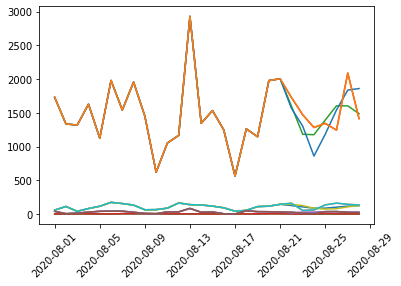

In [ ]:
AR_MT_daily_cases_THREE = AR(MT_daily_cases, 3, date)
AR_NC_daily_cases_THREE = AR(NC_daily_cases, 3, date)
AR_MT_daily_death_THREE = AR(MT_daily_death, 3, date)
AR_NC_daily_death_THREE = AR(NC_daily_death, 3, date)

AR_MT_daily_cases_FIVE = AR(MT_daily_cases, 5, date)
AR_NC_daily_cases_FIVE = AR(NC_daily_cases, 5, date)
AR_MT_daily_death_FIVE = AR(MT_daily_death, 5, date)
AR_NC_daily_death_FIVE = AR(NC_daily_death, 5, date)

mse_mtcases_THREE = np.sum((AR_MT_daily_cases_THREE - MT_daily_cases[-7:])**2)/7
mse_nccases_THREE = np.sum((AR_NC_daily_cases_THREE - NC_daily_cases[-7:])**2)/7
mse_mtdeath_THREE = np.sum((AR_MT_daily_death_THREE - MT_daily_death[-7:])**2)/7
mse_ncdeath_THREE = np.sum((AR_NC_daily_death_THREE - NC_daily_death[-7:])**2)/7

mse_mtcases_FIVE = np.sum((AR_MT_daily_cases_FIVE - MT_daily_cases[-7:])**2)/7
mse_nccases_FIVE = np.sum((AR_NC_daily_cases_FIVE - NC_daily_cases[-7:])**2)/7
mse_mtdeath_FIVE = np.sum((AR_MT_daily_death_FIVE - MT_daily_death[-7:])**2)/7
mse_ncdeath_FIVE = np.sum((AR_NC_daily_death_FIVE - NC_daily_death[-7:])**2)/7

print("MSE")
print('MSE MT CASES (parameter=3) = ' + str(mse_mtcases_THREE))
print('MSE NC CASES (parameter=3) = ' + str(mse_nccases_THREE))
print('MSE MT DEATH (parameter=3) = ' + str(mse_mtdeath_THREE))
print('MSE NC DEATH (parameter=3) = ' + str(mse_ncdeath_THREE))
print('MSE MT CASES (parameter=5) = ' + str(mse_mtcases_FIVE))
print('MSE NC CASES (parameter=5) = ' + str(mse_nccases_FIVE))
print('MSE MT DEATH (parameter=5) = ' + str(mse_mtdeath_FIVE))
print('MSE NC DEATH (parameter=5) = ' + str(mse_ncdeath_FIVE))

mape_mtcases_THREE = np.sum(abs((MT_daily_cases[-7:] - AR_MT_daily_cases_THREE)/MT_daily_cases[-7:]))/7 * 100
mape_nccases_THREE = np.sum(abs((NC_daily_cases[-7:] - AR_NC_daily_cases_THREE)/NC_daily_cases[-7:]))/7 * 100
mape_mtdeath_THREE = np.sum(abs((MT_daily_death[-7:] - AR_MT_daily_death_THREE)/MT_daily_death[-7:]))/7 * 100
mape_ncdeath_THREE = np.sum(abs((NC_daily_death[-7:] - AR_NC_daily_death_THREE)/NC_daily_death[-7:]))/7 * 100

mape_mtcases_FIVE = np.sum(abs((MT_daily_cases[-7:] - AR_MT_daily_cases_FIVE)/MT_daily_cases[-7:]))/7 * 100
mape_nccases_FIVE = np.sum(abs((NC_daily_cases[-7:] - AR_NC_daily_cases_FIVE)/NC_daily_cases[-7:]))/7 * 100
mape_mtdeath_FIVE = np.sum(abs((MT_daily_death[-7:] - AR_MT_daily_death_FIVE)/MT_daily_death[-7:]))/7 * 100
mape_ncdeath_FIVE = np.sum(abs((NC_daily_death[-7:] - AR_NC_daily_death_FIVE)/NC_daily_death[-7:]))/7 * 100

print("MAPE in %")
print('MAPE MT CASES (parameter=3) = ' + str(mape_mtcases_THREE))
print('MAPE NC CASES (parameter=3) = ' + str(mape_nccases_THREE))
print('MAPE MT DEATH (parameter=3) = ' + str(mape_mtdeath_THREE))
print('MAPE NC DEATH (parameter=3) = ' + str(mape_ncdeath_THREE))
print('MAPE MT CASES (parameter=5) = ' + str(mape_mtcases_FIVE))
print('MAPE NC CASES (parameter=5) = ' + str(mape_nccases_FIVE))
print('MAPE MT DEATH (parameter=5) = ' + str(mape_mtdeath_FIVE))
print('MAPE NC DEATH (parameter=5) = ' + str(mape_ncdeath_FIVE))

array([1603, 1183, 1176, 1393, 1605, 1604, 1488])

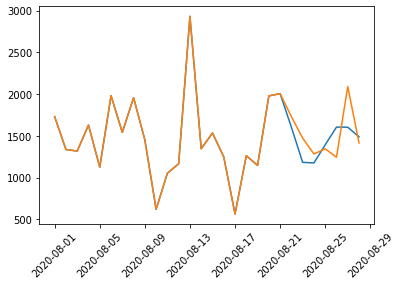

In [ ]:
AR(NC_daily_cases,3, date)

array([125, 106,  86,  87, 101, 117, 123])

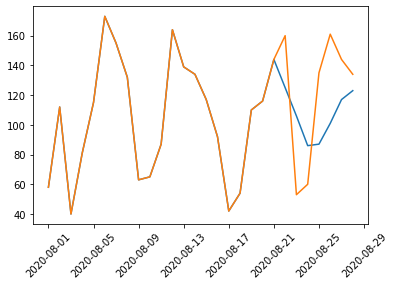

In [ ]:
AR(MT_daily_cases,3, date)

array([1569, 1305,  860, 1182, 1543, 1838, 1861])

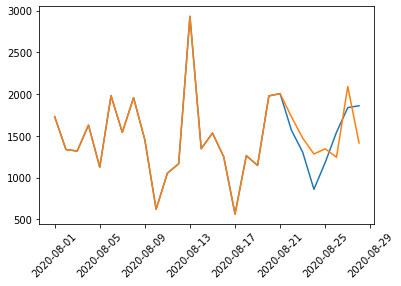

In [ ]:
AR(NC_daily_cases,5, date)

array([142, 126,  85,  73,  79, 106, 126])

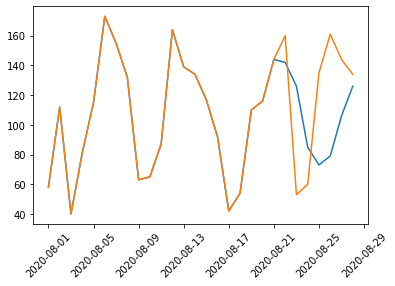

In [ ]:
AR(MT_daily_cases,5, date)

array([25, 25, 28, 31, 31, 29, 27])

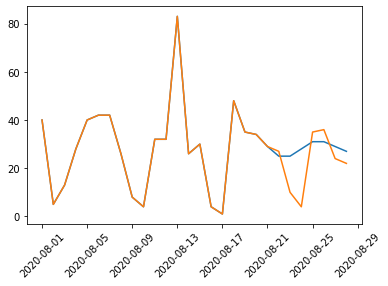

In [ ]:
AR(NC_daily_death,3, date)

array([14, 25, 26, 35, 37, 29, 26])

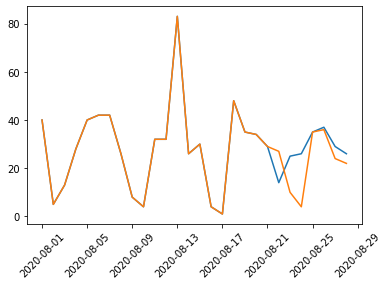

In [ ]:
AR(NC_daily_death,5, date)

array([4, 3, 2, 1, 0, 0, 0])

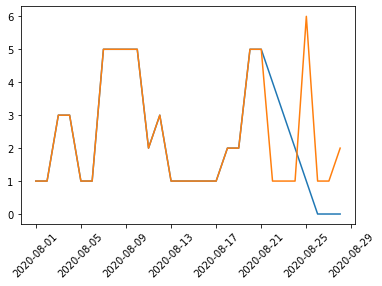

In [ ]:
AR(MT_daily_death,5, date)

array([3, 1, 0, 0, 0, 1, 1])

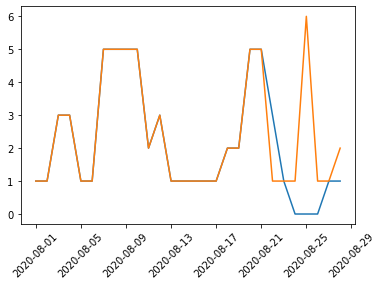

In [ ]:
AR(MT_daily_death,3, date)

In [ ]:
def EWMA(original, alpha):
    predicted = [0] * len(original)
    predicted[0] = original[0]
    for i in range(1, len(original)):
        predicted[i] = int((1-alpha) * predicted[i - 1] + (alpha) * original[i - 1])
    # print(len(predicted))
    return np.array(predicted[-7:])

In [ ]:
EWMA_MT_daily_cases_5 = EWMA(MT_daily_cases, 0.5)
EWMA_NC_daily_cases_5 = EWMA(NC_daily_cases, 0.5)
EWMA_MT_daily_death_5 = EWMA(MT_daily_death, 0.5)
EWMA_NC_daily_death_5 = EWMA(NC_daily_death, 0.5)

EWMA_MT_daily_cases_8 = EWMA(MT_daily_cases, 0.8)
EWMA_NC_daily_cases_8 = EWMA(NC_daily_cases, 0.8)
EWMA_MT_daily_death_8 = EWMA(MT_daily_death, 0.8)
EWMA_NC_daily_death_8 = EWMA(NC_daily_death, 0.8)

mse_mtcases_5 = np.sum((EWMA_MT_daily_cases_5 - MT_daily_cases[-7:])**2)/7
mse_nccases_5 = np.sum((EWMA_NC_daily_cases_5 - NC_daily_cases[-7:])**2)/7
mse_mtdeath_5 = np.sum((EWMA_MT_daily_death_5 - MT_daily_death[-7:])**2)/7
mse_ncdeath_5 = np.sum((EWMA_NC_daily_death_5 - NC_daily_death[-7:])**2)/7

mse_mtcases_8 = np.sum((EWMA_MT_daily_cases_8 - MT_daily_cases[-7:])**2)/7
mse_nccases_8 = np.sum((EWMA_NC_daily_cases_8 - NC_daily_cases[-7:])**2)/7
mse_mtdeath_8 = np.sum((EWMA_MT_daily_death_8 - MT_daily_death[-7:])**2)/7
mse_ncdeath_8 = np.sum((EWMA_NC_daily_death_8 - NC_daily_death[-7:])**2)/7

print("MSE")
print('MSE MT CASES (alpha=0.5) = ' + str(mse_mtcases_5))
print('MSE NC CASES (alpha=0.5) = ' + str(mse_nccases_5))
print('MSE MT DEATH (alpha=0.5) = ' + str(mse_mtdeath_5))
print('MSE NC DEATH (alpha=0.5) = ' + str(mse_ncdeath_5))
print('MSE MT CASES (alpha=0.8) = ' + str(mse_mtcases_8))
print('MSE NC CASES (alpha=0.8) = ' + str(mse_nccases_8))
print('MSE MT DEATH (alpha=0.8) = ' + str(mse_mtdeath_8))
print('MSE NC DEATH (alpha=0.8) = ' + str(mse_ncdeath_8))

mape_mtcases_5 = np.sum(abs((MT_daily_cases[-7:] - EWMA_MT_daily_cases_5)/MT_daily_cases[-7:]))/7 * 100
mape_nccases_5 = np.sum(abs((NC_daily_cases[-7:] - EWMA_NC_daily_cases_5)/NC_daily_cases[-7:]))/7 * 100
mape_mtdeath_5 = np.sum(abs((MT_daily_death[-7:] - EWMA_MT_daily_death_5)/MT_daily_death[-7:]))/7 * 100
mape_ncdeath_5 = np.sum(abs((NC_daily_death[-7:] - EWMA_NC_daily_death_5)/NC_daily_death[-7:]))/7 * 100

mape_mtcases_8 = np.sum(abs((MT_daily_cases[-7:] - EWMA_MT_daily_cases_8)/MT_daily_cases[-7:]))/7 * 100
mape_nccases_8 = np.sum(abs((NC_daily_cases[-7:] - EWMA_NC_daily_cases_8)/NC_daily_cases[-7:]))/7 * 100
mape_mtdeath_8 = np.sum(abs((MT_daily_death[-7:] - EWMA_MT_daily_death_8)/MT_daily_death[-7:]))/7 * 100
mape_ncdeath_8 = np.sum(abs((NC_daily_death[-7:] - EWMA_NC_daily_death_8)/NC_daily_death[-7:]))/7 * 100

print("MAPE in %")
print('MAPE MT CASES (alpha=0.5) = ' + str(mape_mtcases_5))
print('MAPE NC CASES (alpha=0.5) = ' + str(mape_nccases_5))
print('MAPE MT DEATH (alpha=0.5) = ' + str(mape_mtdeath_5))
print('MAPE NC DEATH (alpha=0.5) = ' + str(mape_ncdeath_5))
print('MAPE MT CASES (alpha=0.8) = ' + str(mape_mtcases_8))
print('MAPE NC CASES (alpha=0.8) = ' + str(mape_nccases_8))
print('MAPE MT DEATH (alpha=0.8) = ' + str(mape_mtdeath_8))
print('MAPE NC DEATH (alpha=0.8) = ' + str(mape_ncdeath_8))

MSE
MSE MT CASES (alpha=0.5) = 2424.0
MSE NC CASES (alpha=0.5) = 129229.71428571429
MSE MT DEATH (alpha=0.5) = 5.857142857142857
MSE NC DEATH (alpha=0.5) = 198.28571428571428
MSE MT CASES (alpha=0.8) = 2613.8571428571427
MSE NC CASES (alpha=0.8) = 166645.2857142857
MSE MT DEATH (alpha=0.8) = 7.285714285714286
MSE NC DEATH (alpha=0.8) = 206.28571428571428
MAPE in %
MAPE MT CASES (alpha=0.5) = 48.351725562418544
MAPE NC CASES (alpha=0.5) = 17.894404613881967
MAPE MT DEATH (alpha=0.5) = 119.04761904761902
MAPE NC DEATH (alpha=0.5) = 103.358929430358
MAPE MT CASES (alpha=0.8) = 45.971274316881846
MAPE NC CASES (alpha=0.8) = 19.747692005707478
MAPE MT DEATH (alpha=0.8) = 119.04761904761905
MAPE NC DEATH (alpha=0.8) = 81.58833230261801
